In [ ]:
import pandas as pd


# A method to get one-to-one difference (in date) between the columns containing dates.
# Creates new columns inplace with name as col1-col2 containing the difference betweeen 2 date columns col1 and col2.
def get_o2o_date_difference(df):

    # Check if a column of type object can be converted to a datetime type object.
    # If it can be, convert it
    for col in df.columns:
        if(df[col].dtype==object):
            try:
                df[col] = pd.to_datetime(df[col])
            except:
                pass

    # Get the name of all datetime type columns
    date_cols = df.select_dtypes(include=['datetime64']).columns

    # Take each datetime column one to one and store their difference into a new column.
    for i in range(len(date_cols)-1):
        for j in range(i+1, len(date_cols)):
            col_name = str(date_cols[i]) + '-' + str(date_cols[j])
            df[col_name] = abs(df[date_cols[i]] - df[date_cols[j]])




# An example data frame with 3 date columns with mixed formats.
df = pd.DataFrame([
                   [1, '2010-07-25', '17/2/1999', '26 Feb \'95', 'mar'],
                   [2, '2005-12-04', '16/5/2016', '26 Mar \'16', 'jan'],
                   [3, '23/12/2009', '26 Sep \'99', '2020-10-30', 'poi'],
                   [4, '26 Jul \'05', '1990-03-31', '1/9/1985', 'sep'],
], columns=['a', 'b', 'c', 'd', 'e'])

print("The example DataFrame with 5 columns, of which 3 are datetime...")
print(df)

get_o2o_date_difference(df)

print("\n\nAfter applying the function...")
print(df)

The example DataFrame with 5 columns, of which 3 are datetime...
   a           b           c           d    e
0  1  2010-07-25   17/2/1999  26 Feb '95  mar
1  2  2005-12-04   16/5/2016  26 Mar '16  jan
2  3  23/12/2009  26 Sep '99  2020-10-30  poi
3  4  26 Jul '05  1990-03-31    1/9/1985  sep


After applying the function...
   a          b          c          d    e       b-c       b-d       c-d
0  1 2010-07-25 1999-02-17 1995-02-26  mar 4176 days 5628 days 1452 days
1  2 2005-12-04 2016-05-16 2016-03-26  jan 3816 days 3765 days   51 days
2  3 2009-12-23 1999-09-26 2020-10-30  poi 3741 days 3964 days 7705 days
3  4 2005-07-26 1990-03-31 1985-01-09  sep 5596 days 7503 days 1907 days


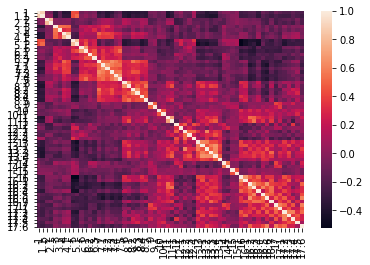

In [86]:
import seaborn as sns
from collections import defaultdict


def drop_minimum_columns_surpassing_threshold(df, threshold):
    pc = df.corr(method='pearson')
    cols = list(pc.columns)

    # storing the mappings of columns whose correlation surpasses the threshold
    cap = defaultdict(lambda:[])
    for r in cols:
        for c in cols:
            if pc[r][c] >= threshold and r!=c:
                cap[r].append(c)
    '''
    Function that returns the next column value to delete 
    based on the number of columns it has correlation more than 
    threshold, and if there are more than one such, then it finds
    the one with the maximum sum of those correlations 
    '''
    next = lambda: max(cap.keys(), key=lambda x:sum([pc[x][c] for c in cap[x]]))
    to_del = next()
    del_list = []
    while len(cap[to_del]) != 0:
        # print('->', to_del,cap)
        for c in cap[to_del]:
            cap[c].remove(to_del)
        cap[to_del].clear()
        del_list.append(to_del)
        to_del = next()
    
    print("The columns that are being dropped are ", end=' ')
    print(del_list)

    return df.drop(del_list, axis=1)


# Downloading and Pre-processing the dataset.
df = sns.load_dataset('brain_networks') \
        .iloc[3:] \
        .set_index('network') \
        .astype('float')


sns.heatmap(df.corr('pearson'), xticklabels=df.columns, yticklabels=df.columns)


The columns that are being dropped are  ['13.4', '7.3', '16.2', '7.4', '8.1', '17.2', '17.6', '13', '1', '5', '4', '2', '11', '6', '16', '7.1', '8.2', '12.2', '16.3', '17', '13.1', '3']


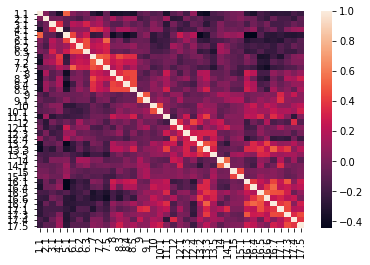

In [87]:

# Here, to demonstrate the task with an appropriate example, the value 0.85 is too small.
# So, in order to show the effect of the function(as needed), the value 0.55 is selected.
# That value is a parameter passed to the function and thus is variable.
df = drop_minimum_columns_surpassing_threshold(df, 0.55)

sns.heatmap(df.corr('pearson'), xticklabels=df.columns, yticklabels=df.columns)